In [1]:
pip install python-binance ta

     |████████████████████████████████| 63 kB 1.0 MB/s 
     |████████████████████████████████| 103 kB 25.5 MB/s 
     |████████████████████████████████| 1.1 MB 31.0 MB/s 
     |████████████████████████████████| 288 kB 43.2 MB/s 
     |████████████████████████████████| 214 kB 36.4 MB/s 
     |████████████████████████████████| 271 kB 53.7 MB/s 
     |████████████████████████████████| 192 kB 57.8 MB/s 
     |████████████████████████████████| 160 kB 57.2 MB/s 
  Created wheel for ta: filename=ta-0.7.0-py3-none-any.whl size=28718 sha256=8c59b4ab89bc4715e0b8ecf9641a00a12eb48db3bc57279ee725a8294817be48
  Stored in directory: /root/.cache/pip/wheels/5e/74/e0/72395003bd1d3c8f3f5860c2d180ff15699e47a2733d8ebd38
Successfully built ta


<h1>Load yours data</h1>

In [ ]:
# -- Import --
import pandas as pd
from binance.client import Client
import ta
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
import time
from math import *
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# -- Define Binance Client --
client = Client()

# -- You can change the crypto pair ,the start date and the time interval below --
pairName = "VETUSDT"
startDate = "01 january 2019"
timeInterval = Client.KLINE_INTERVAL_1HOUR

# -- Load all price data from binance API --
klinesT = client.get_historical_klines(pairName, timeInterval, startDate)

# -- Define your dataset --
df = pd.DataFrame(klinesT, columns = ['timestamp', 'open', 'high', 'low', 'close', 'volume', 'close_time', 'quote_av', 'trades', 'tb_base_av', 'tb_quote_av', 'ignore' ])
df['close'] = pd.to_numeric(df['close'])
df['high'] = pd.to_numeric(df['high'])
df['low'] = pd.to_numeric(df['low'])
df['open'] = pd.to_numeric(df['open'])

# -- Set the date to index --
df = df.set_index(df['timestamp'])
df.index = pd.to_datetime(df.index, unit='ms')
del df['timestamp']

print("Data loaded 100%")

# -- Uncomment the line below if you want to check your price dataset --
# df

Data loaded 100%


<h1>Define your indicators</h1>

In [ ]:
# -- Drop all columns we do not need --
df.drop(df.columns.difference(['open','high','low','close','volume']), 1, inplace=True)

# -- Indicators, you can edit every value --
df['EMA200'] = ta.trend.ema_indicator(close=df['close'], window=200)
# -- Trix Indicator --
trixLength =8
trixSignal = 19
df['TRIX'] = ta.trend.ema_indicator(ta.trend.ema_indicator(ta.trend.ema_indicator(close=df['close'], window=trixLength), window=trixLength), window=trixLength)
df['TRIX_PCT'] = df["TRIX"].pct_change()*100
df['TRIX_SIGNAL'] = ta.trend.sma_indicator(df['TRIX_PCT'],trixSignal)
df['TRIX_HISTO'] = df['TRIX_PCT'] - df['TRIX_SIGNAL']


# -- Stochasitc RSI --
df['STOCH_RSI'] = ta.momentum.stochrsi(close=df['close'], window=11, smooth1=3, smooth2=3)
stochTop = 0.82
stochBottom = 0.2

print("Indicators loaded 100%")

# -- Uncomment the line below if you want to check your dataset with indicators --
df

Indicators loaded 100%


,open,high,low,close,volume,EMA200,TRIX,TRIX_PCT,TRIX_SIGNAL,TRIX_HISTO,STOCH_RSI
timestamp,,,,,,,,,,,
2019-01-01 00:00:00,0.003921,0.003930,0.003905,0.003921,4400023.00000000,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-01 01:00:00,0.003921,0.003931,0.003899,0.003899,3450296.00000000,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-01 02:00:00,0.003900,0.003902,0.003875,0.003890,4586081.00000000,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-01 03:00:00,0.003888,0.003901,0.003860,0.003887,5876777.00000000,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-01 04:00:00,0.003881,0.003935,0.003872,0.003888,9764884.00000000,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2021-11-02 12:00:00,0.136560,0.139890,0.136560,0.139210,60506849.00000000,0.132739,0.135109,0.084823,0.078881,0.005942,1.000000
2021-11-02 13:00:00,0.139240,0.142500,0.139130,0.141750,111968966.60000000,0.132829,0.135306,0.145727,0.077549,0.068178,1.000000
2021-11-02 14:00:00,0.141750,0.142180,0.140020,0.140770,49748301.60000000,0.132908,0.135577,0.200114,0.079137,0.120977,0.761422


<h1>1 Parameter optimizer</h1>

<h1>2 Parameters optimizer</h1>


In [ ]:
from datetime import datetime, timedelta, time
dfTest = None
dt = None
dt = pd.DataFrame(columns = ['param1','param2', 'result'])
dt2= pd.DataFrame(columns = ['param1','param2','result'])

# dfTest = df.copy()

# -- If you want to run your BackTest on a specific period, uncomment the line below --
dfTest = df['2017-01-01':]

# -- Condition to BUY market --
def buyCondition(row):
  if row['TRIX_HISTO'] > 0 and row['STOCH_RSI'] < stochTop:
    return True
  else:
    return False

# -- Condition to SELL market --  
def sellCondition(row):
  if row['TRIX_HISTO'] < 0 and row['STOCH_RSI'] > stochBottom:
    return True
  else:
    return False
i=9
j=13
usdt = 1000
coin = 0
iter2=0
iter=0
count = 0
for index, row in dfTest.iterrows():
   maxCount=len(dfTest)
   print("Loading...",count,'/',maxCount)
   iter+=1
   count+=1
   iter2+=1
   time=dfTest.index[0].date()-index.date()
   if int(time.days)<-200 and iter2>=336:
     iter2=0
     loopI = [6,15,1]
     enumI = ceil((loopI[1] - loopI[0]) / loopI[2])
     loopJ = [10,20,1]
     enumJ = ceil((loopJ[1] - loopJ[0]) / loopJ[2])
     dfTest2=df[str(index.date()-timedelta(160)):str(index.date())]
     dt = None
     dt = pd.DataFrame(columns = ['param1','param2', 'result'])
     myrow = {}
     for l in range(loopI[0], loopI[1], loopI[2]):
       print((index.date()-timedelta(120)),(index.date()))
       for m in range(loopJ[0], loopJ[1], loopJ[2]):
         # -- You can change variables below --
         usdt1 = 1000
         coin1 = 0
         trixLength = l
         trixSignal = m
         dfTest2['TRIX'] = ta.trend.ema_indicator(ta.trend.ema_indicator(ta.trend.ema_indicator(close=dfTest2['close'], window=trixLength), window=trixLength), window=trixLength)
         dfTest2['TRIX_PCT'] = dfTest2["TRIX"].pct_change()*100
         dfTest2['TRIX_SIGNAL'] = ta.trend.sma_indicator(dfTest2['TRIX_PCT'],trixSignal)
         dfTest2['TRIX_HISTO'] = dfTest2['TRIX_PCT'] - dfTest2['TRIX_SIGNAL']
         for index2, row2 in dfTest2.iterrows():
           #BUY
           if buyCondition(row2) and usdt1 > 0:
             coin1 = (usdt1/dfTest2['close'][index2]) - 0.0007*(usdt1/dfTest2['close'][index2])
             usdt1 = 0
           #SELL
           elif sellCondition(row2) and coin1 > 0:
             usdt1 = coin1*dfTest2['close'][index2] - (0.0007*coin1*dfTest2['close'][index2])
             coin1 = 0
         myrow = {'param1': l, 'param2': m,'result': coin1*dfTest2.iloc[len(dfTest2)-1]['close'] + usdt1}
         dt = dt.append(myrow,ignore_index=True)
     l=round(dt.sort_values(by=['result']).tail(12).mean()[0])
     m=round(dt.sort_values(by=['result']).tail(12).mean()[1])
     if l-i>0 or l-i<0:
       i=l
     if m-j<0 or m-j>0:
       j=m
     dt2=dt2.append(({'param1':i,'param2':j,'result':coin*dfTest.iloc[iter]['close']+usdt}),ignore_index=True)
   else:
     trixLength = i
     trixSignal = j
     dfTest['TRIX'] = ta.trend.ema_indicator(ta.trend.ema_indicator(ta.trend.ema_indicator(close=dfTest['close'], window=trixLength), window=trixLength), window=trixLength)
     dfTest['TRIX_PCT'] = dfTest["TRIX"].pct_change()*100
     dfTest['TRIX_SIGNAL'] = ta.trend.sma_indicator(dfTest['TRIX_PCT'],trixSignal)
     dfTest['TRIX_HISTO'] = dfTest['TRIX_PCT'] - dfTest['TRIX_SIGNAL']
      #BUY
     if buyCondition(row) and usdt > 0:
        coin = (usdt/dfTest['close'][index]) - 0.0007*(usdt/dfTest['close'][index])
        usdt = 0

      #SELL
     elif sellCondition(row) and coin > 0:
        usdt = coin*dfTest['close'][index] - (0.0007*coin*dfTest['close'][index])
        coin = 0
dt2.plot.scatter(x='param1',y='param2',c='result',s=50,colormap='OrRd',figsize=(8,6))
plt.show()
print(coin*dfTest.iloc[len(dfTest)-1]['close'] + usdt)

In [ ]:
print(dt2)

<h1>3 Parameters optimizer</h1>



                     startTime          time  ...  TRIX_HISTO  STOCH_RSI
0    2021-10-21T06:00:00+00:00  1.634796e+12  ...         NaN        NaN
1    2021-10-21T07:00:00+00:00  1.634800e+12  ...         NaN        NaN
2    2021-10-21T08:00:00+00:00  1.634803e+12  ...         NaN        NaN
3    2021-10-21T09:00:00+00:00  1.634807e+12  ...         NaN        NaN
4    2021-10-21T10:00:00+00:00  1.634810e+12  ...         NaN        NaN
..                         ...           ...  ...         ...        ...
145  2021-10-27T07:00:00+00:00  1.635318e+12  ...    0.034667   0.946206
146  2021-10-27T08:00:00+00:00  1.635322e+12  ...    0.040054   0.495526
147  2021-10-27T09:00:00+00:00  1.635325e+12  ...    0.041191   0.319033
148  2021-10-27T10:00:00+00:00  1.635329e+12  ...    0.042223   0.623238
149  2021-10-27T11:00:00+00:00  1.635332e+12  ...    0.041930   0.473164

[150 rows x 12 columns]
coin price : 5.613e-05 usd balance 0 coin balance : 0
If you  give me more USD I will buy more SHIB

<h1>RUN the Spot Backtest</h1>

In [ ]:
dfTest = None
# dfTest = df.copy()

# -- If you want to run your BackTest on a specific period, uncomment the line below --
dfTest = df['2021-06-01':]

# -- Definition of dt, that will be the dataset to do your trades analyses --
dt = None
dt = pd.DataFrame(columns = ['date','position', 'reason', 'price', 'frais' ,'fiat', 'coins', 'wallet', 'drawBack'])

# -- You can change variables below --
usdt = 1000
makerFee = 0.0002
takerFee = 0.0007

# -- Do not touch these values --
initalWallet = usdt
wallet = usdt
coin = 0
lastAth = 0
previousRow = dfTest.iloc[0]
stopLoss = 0
takeProfit = 500000
buyReady = True
sellReady = True

# -- Condition to BUY market --
def buyCondition(row, previousRow):
  if row['TRIX_HISTO'] > 0 and row['STOCH_RSI'] < stochTop:
    return True
  else:
    return False

# -- Condition to SELL market --  
def sellCondition(row, previousRow):
  if row['TRIX_HISTO'] < 0 and row['STOCH_RSI'] > stochBottom:
    return True
  else:
    return False

# -- Iteration on all your price dataset (df) --
for index, row in dfTest.iterrows():
  # -- Buy market order --
  if buyCondition(row, previousRow) and usdt > 0 and buyReady == True:
    # -- You can define here at what price you buy --
    buyPrice = row['close']

    # -- Define the price of you SL and TP or comment it if you don't want a SL or TP --
    # stopLoss = buyPrice - 0.02 * buyPrice
    # takeProfit = buyPrice + 0.04 * buyPrice

    coin = usdt / buyPrice
    fee = takerFee * coin
    coin = coin - fee
    usdt = 0
    wallet = coin * row['close']

    # -- Check if your wallet hit a new ATH to know the drawBack --
    if wallet > lastAth:
      lastAth = wallet

    # -- You can uncomment the line below if you want to see logs --
    # print("Buy COIN at",buyPrice,'$ the', index)

    # -- Add the trade to DT to analyse it later --
    myrow = {'date': index, 'position': "Buy", 'reason':'Buy Market Order','price': buyPrice,'frais': fee,'fiat': usdt,'coins': coin,'wallet': wallet,'drawBack':(wallet-lastAth)/lastAth}
    dt = dt.append(myrow,ignore_index=True)
  
  # -- Stop Loss --
  elif row['low'] < stopLoss and coin > 0:
    sellPrice = stopLoss
    usdt = coin * sellPrice
    fee = makerFee * usdt
    usdt = usdt - fee
    coin = 0
    buyReady = False
    wallet = usdt

    # -- Check if your wallet hit a new ATH to know the drawBack --
    if wallet > lastAth:
      lastAth = wallet
      
    # -- You can uncomment the line below if you want to see logs --
    # print("Sell COIN at Stop Loss",sellPrice,'$ the', index)

    # -- Add the trade to DT to analyse it later --
    myrow = {'date': index,'position': "Sell", 'reason':'Sell Stop Loss','price': sellPrice,'frais': fee,'fiat': usdt,'coins': coin,'wallet': wallet,'drawBack':(wallet-lastAth)/lastAth}
    dt = dt.append(myrow,ignore_index=True)    

  # -- Sell Market Order --
  elif sellCondition(row, previousRow) and coin > 0 and sellReady == True:

    # -- You can define here at what price you buy --
    sellPrice = row['close']
    usdt = coin * sellPrice
    fee = takerFee * usdt
    usdt = usdt - fee
    coin = 0
    buyReady = True
    wallet = usdt

    # -- Check if your wallet hit a new ATH to know the drawBack --
    if wallet > lastAth:
      lastAth = wallet

    # -- You can uncomment the line below if you want to see logs --  
    # print("Sell COIN at",sellPrice,'$ the', index)

    # -- Add the trade to DT to analyse it later --
    myrow = {'date': index,'position': "Sell", 'reason':'Sell Market Order','price': sellPrice,'frais': fee,'fiat': usdt,'coins': coin,'wallet': wallet,'drawBack':(wallet-lastAth)/lastAth}
    dt = dt.append(myrow,ignore_index=True)
  
  previousRow = row

# -- BackTest Analyses --
dt = dt.set_index(dt['date'])
dt.index = pd.to_datetime(dt.index)
dt['resultat'] = dt['wallet'].diff()
dt['resultat%'] = dt['wallet'].pct_change()*100
dt.loc[dt['position']=='Buy','resultat'] = None
dt.loc[dt['position']=='Buy','resultat%'] = None

dt['tradeIs'] = ''
dt.loc[dt['resultat']>0,'tradeIs'] = 'Good'
dt.loc[dt['resultat']<=0,'tradeIs'] = 'Bad'

iniClose = dfTest.iloc[0]['close']
lastClose = dfTest.iloc[len(dfTest)-1]['close']
holdPercentage = ((lastClose - iniClose)/iniClose) * 100
algoPercentage = ((wallet - initalWallet)/initalWallet) * 100
vsHoldPercentage = ((algoPercentage - holdPercentage)/holdPercentage) * 100

try:
    tradesPerformance = round(dt.loc[(dt['tradeIs'] == 'Good') | (dt['tradeIs'] == 'Bad'), 'resultat%'].sum()
            / dt.loc[(dt['tradeIs'] == 'Good') | (dt['tradeIs'] == 'Bad'), 'resultat%'].count(), 2)
except:
    tradesPerformance = 0
    print("/!\ There is no Good or Bad Trades in your BackTest, maybe a problem...")

try:
    totalGoodTrades = dt.groupby('tradeIs')['date'].nunique()['Good']
    AveragePercentagePositivTrades = round(dt.loc[dt['tradeIs'] == 'Good', 'resultat%'].sum()
                                           / dt.loc[dt['tradeIs'] == 'Good', 'resultat%'].count(), 2)
    idbest = dt.loc[dt['tradeIs'] == 'Good', 'resultat%'].idxmax()
    bestTrade = str(
        round(dt.loc[dt['tradeIs'] == 'Good', 'resultat%'].max(), 2))
except:
    totalGoodTrades = 0
    AveragePercentagePositivTrades = 0
    idbest = ''
    bestTrade = 0
    print("/!\ There is no Good Trades in your BackTest, maybe a problem...")

try:
    totalBadTrades = dt.groupby('tradeIs')['date'].nunique()['Bad']
    AveragePercentageNegativTrades = round(dt.loc[dt['tradeIs'] == 'Bad', 'resultat%'].sum()
                                           / dt.loc[dt['tradeIs'] == 'Bad', 'resultat%'].count(), 2)
    idworst = dt.loc[dt['tradeIs'] == 'Bad', 'resultat%'].idxmin()
    worstTrade = round(dt.loc[dt['tradeIs'] == 'Bad', 'resultat%'].min(), 2)
except:
    totalBadTrades = 0
    AveragePercentageNegativTrades = 0
    idworst = ''
    worstTrade = 0
    print("/!\ There is no Bad Trades in your BackTest, maybe a problem...")

totalTrades = totalBadTrades + totalGoodTrades
winRateRatio = (totalGoodTrades/totalTrades) * 100

reasons = dt['reason'].unique()

dt

,date,position,reason,price,frais,fiat,coins,wallet,drawBack,resultat,resultat%,tradeIs
date,,,,,,,,,,,,
2021-06-01 01:00:00,2021-06-01 01:00:00,Buy,Buy Market Order,0.8330,0.840336,0,1199.639856,999.300000,0.000000,NaN,NaN,
2021-06-01 05:00:00,2021-06-01 05:00:00,Sell,Sell Market Order,0.8496,0.713450,1018.5,0.000000,1018.500572,0.000000,19.200572,1.921402,Good
2021-06-02 00:00:00,2021-06-02 00:00:00,Buy,Buy Market Order,0.8195,0.869982,0,1241.961710,1017.787621,-0.000700,NaN,NaN,
2021-06-03 02:00:00,2021-06-03 02:00:00,Sell,Sell Market Order,0.8482,0.737402,1052.69,0.000000,1052.694520,0.000000,34.906899,3.429684,Good
2021-06-03 11:00:00,2021-06-03 11:00:00,Buy,Buy Market Order,0.8725,0.844569,0,1205.682102,1051.957634,-0.000700,NaN,NaN,
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-27 22:00:00,2021-10-27 22:00:00,Buy,Buy Market Order,0.7662,1.287334,0,1837.761699,1408.093013,-0.280172,NaN,NaN,
2021-10-29 18:00:00,2021-10-29 18:00:00,Sell,Sell Market Order,1.2885,1.657569,2366.3,0.000000,2366.298379,0.000000,958.205366,68.049863,Good
2021-10-30 15:00:00,2021-10-30 15:00:00,Buy,Buy Market Order,2.3453,0.706267,0,1008.247120,2364.641971,-0.000700,NaN,NaN,


<h1>Print Complete BackTest Analyses</h1>

In [ ]:
print("Pair Symbol :",pairName)
print("Period : [" + str(dfTest.index[0]) + "] -> [" +
      str(dfTest.index[len(dfTest)-1]) + "]")
print("Starting balance :", initalWallet, "$")

print("\n----- General Informations -----")
print("Final balance :", round(wallet, 2), "$")
print("Performance vs US Dollar :", round(algoPercentage, 2), "%")
print("Buy and Hold Performence :", round(holdPercentage, 2), "%")
print("Performance vs Buy and Hold :", round(vsHoldPercentage, 2), "%")
print("Best trade : +"+bestTrade, "%, the", idbest)
print("Worst trade :", worstTrade, "%, the", idworst)
print("Worst drawBack :", str(100*round(dt['drawBack'].min(), 2)), "%")
print("Total fees : ", round(dt['frais'].sum(), 2), "$")

print("\n----- Trades Informations -----")
print("Total trades on period :",totalTrades)
print("Number of positive trades :", totalGoodTrades)
print("Number of negative trades : ", totalBadTrades)
print("Trades win rate ratio :", round(winRateRatio, 2), '%')
print("Average trades performance :",tradesPerformance,"%")
print("Average positive trades :", AveragePercentagePositivTrades, "%")
print("Average negative trades :", AveragePercentageNegativTrades, "%")

print("\n----- Trades Reasons -----")
reasons = dt['reason'].unique()
for r in reasons:
    print(r+" number :", dt.groupby('reason')['date'].nunique()[r])

Pair Symbol : MANAUSDT
Period : [2021-06-01 00:00:00] -> [2021-11-01 20:00:00]
Starting balance : 1000 $

----- General Informations -----
Final balance : 3647.97 $
Performance vs US Dollar : 264.8 %
Buy and Hold Performence : 247.73 %
Performance vs Buy and Hold : 6.89 %
Best trade : +68.05 %, the 2021-10-29 18:00:00
Worst trade : -13.59 %, the 2021-06-22 14:00:00
Worst drawBack : -33.0 %
Total fees :  294.46 $

----- Trades Informations -----
Total trades on period : 129
Number of positive trades : 61
Number of negative trades :  68
Trades win rate ratio : 47.29 %
Average trades performance : 1.4 %
Average positive trades : 5.9 %
Average negative trades : -2.65 %

----- Trades Reasons -----
Buy Market Order number : 130
Sell Market Order number : 129


<h1>Plot to improve ...</h1>


----- Plot -----


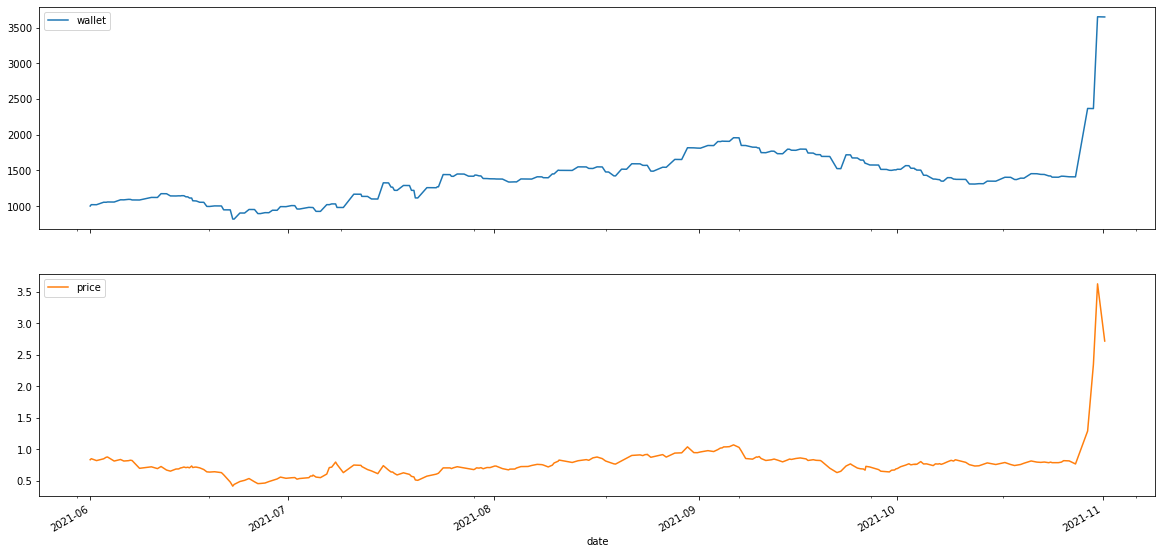

In [ ]:
dt[['wallet', 'price']].plot(subplots=True, figsize=(20, 10))
print("\n----- Plot -----")